In [1]:
import numpy as np
from math import pi, cos, sin

In [2]:
N = 100
angles = np.linspace(0, 2*pi, N)
x = np.array([20*cos(th) for th in angles])
y = np.array([20*sin(th) for th in angles])

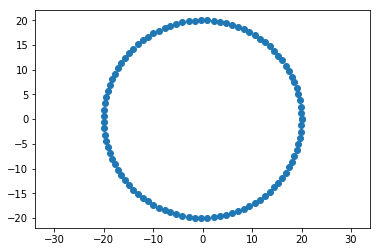

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.axis('equal')
plt.scatter(x, y)

In [4]:
X = np.column_stack((x, y))

In [5]:
from sklearn.metrics.pairwise import linear_kernel, rbf_kernel
K_lin = linear_kernel(X)

In [6]:
np.linalg.matrix_rank(K_lin)

2

In [7]:
K_rbf = rbf_kernel(X)
np.linalg.matrix_rank(K_rbf)

99

In [9]:
import random

def sample(K):
    N, _ = K.shape
    lam, v = map(np.real, np.linalg.eig(K))
    V = v[:, [random.random() < lam[i] / (lam[i] + 1) for i in range(N)]]
    _, nb = V.shape
    selected = []
    while nb:
        V, _ = np.linalg.qr(V)
        proba = ((V ** 2) / nb).sum(axis=1)
        k = np.random.choice(N, p=proba)
        selected.append(k)
        removed_index = np.where(V[k, :] != 0)[0][0]
        remover = V[:, removed_index] / V[k, removed_index]
        V = V - np.outer(remover, V[k, :])
        V = np.delete(V, removed_index, axis=1)
        nb -= 1
    return selected

[13, 37]


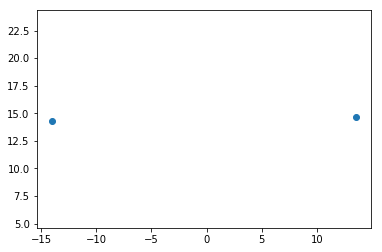

In [17]:
selected = sample(K_lin)
print(selected)

plt.axis('equal')
plt.scatter(x[selected], y[selected])

35 points [0, 6, 7, 10, 12, 16, 18, 21, 30, 32, 34, 38, 40, 41, 46, 50, 52, 53, 60, 61, 62, 63, 64, 66, 67, 69, 71, 75, 79, 80, 82, 83, 86, 94, 97]


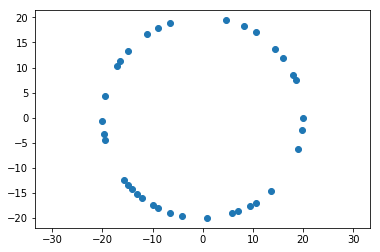

In [16]:
selected = sample(K_rbf)
print(len(selected), 'points', sorted(selected))

plt.axis('equal')
plt.scatter(x[selected], y[selected])